In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('ex1data1.txt',header=None,sep = ",")
#header = None, prevent pandas to treat first row as columns name
df.columns = ['population','profit']
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


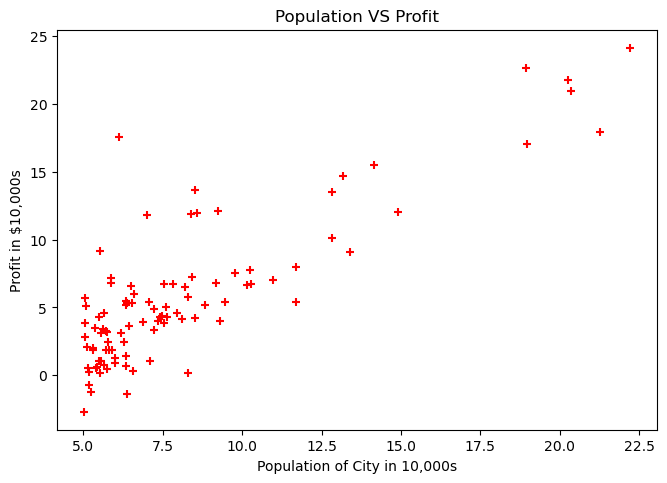

In [3]:
fig = plt.figure(dpi = 100)
ax = fig.add_axes([1,1,1,1])

ax.scatter(df['population'],df['profit'],color = 'red',marker = '+')
ax.set(xlabel = 'Population of City in 10,000s',
      ylabel = 'Profit in $10,000s',title = 'Population VS Profit');

In [4]:
x_train = np.array(df.iloc[:,0],dtype = float).reshape(-1,1)
y_train = np.array(df.iloc[:,1],dtype = float)
print(x_train.shape)
print(y_train.shape)

(97, 1)
(97,)


## Gradient Descent

In [5]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(learning_rate='constant',eta0=0.01,max_iter=30000,
                    penalty=None,)
print(model)

SGDRegressor(learning_rate='constant', max_iter=30000, penalty=None)


In [6]:
model.fit(x_train,y_train)

SGDRegressor(learning_rate='constant', max_iter=30000, penalty=None)

In [7]:
y_pred_sgd = model.predict(x_train)
print(y_pred_sgd.shape)

(97,)


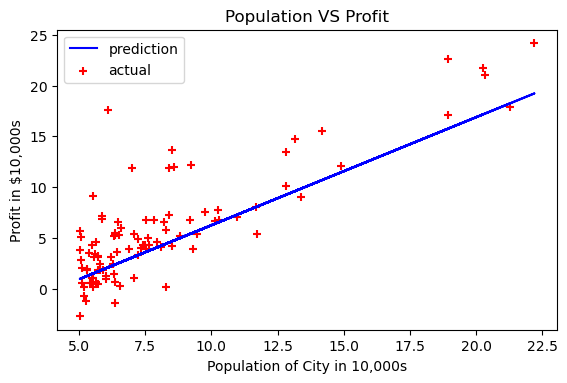

In [8]:
fig = plt.figure(dpi = 100,figsize=(5,3))
ax = fig.add_axes([1,1,1,1])

ax.scatter(df['population'],df['profit'],color = 'red',marker = '+',label = 'actual')
ax.plot(df['population'],y_pred_sgd,color = 'blue',label = 'prediction')
ax.legend()
ax.set(xlabel = 'Population of City in 10,000s',
      ylabel = 'Profit in $10,000s',title = 'Population VS Profit');

## Normal Equation / OLS

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
print(model)

LinearRegression()


In [11]:
model.fit(x_train,y_train)

LinearRegression()

In [12]:
y_pred = model.predict(x_train)

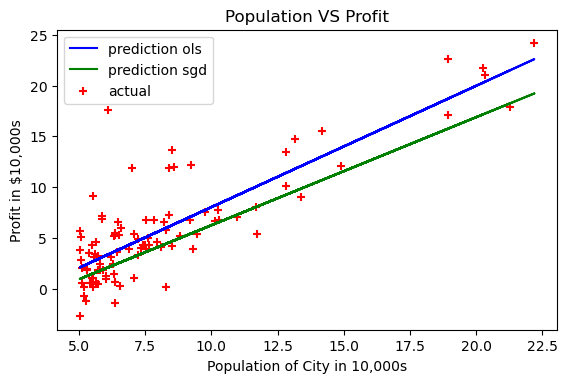

In [13]:
fig = plt.figure(dpi = 100,figsize=(5,3))
ax = fig.add_axes([1,1,1,1])

ax.scatter(df['population'],df['profit'],color = 'red',marker = '+',label = 'actual')
ax.plot(df['population'],y_pred,color = 'blue',label = 'prediction ols')
ax.plot(df['population'],y_pred_sgd,color = 'green',label = 'prediction sgd')
ax.legend()
ax.set(xlabel = 'Population of City in 10,000s',
      ylabel = 'Profit in $10,000s',title = 'Population VS Profit');